# Section 3.1: MODEL

In [1]:
# IMPORTATIONS
import os
import sys
import time
from numpy import *
from matplotlib.pylab import *
from decimal import Decimal
import pickle
import inspect

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving
import cuspcore_go

reload(treal_functions)
reload(general_functions)
reload(slopes_functions)
reload(prepare_functions)
reload(fit)
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(cuspcore_go)

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

# PARAMETERS
execfile("single_params.py")
directory='/cs/sci/freundlich/CUSPCORE/Michael/'
components=['d']

Ttype='jeans-Mreal'
sim = 'g1.08e11'
k=30

rmin_evolve=0.01
rmax_evolve=1
constrain_fit=True
constrain_evolution=True
linear_slopes=True

execfile("single_initialization.py")
execfile("single_load.py")
        
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )
    
print 'Done on %s at %s'%(time.strftime("%x"),time.strftime("%X"))

/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Simulation g1.08e11
 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal
 
Done on 07/07/19 at 19:24:04


In [2]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.9
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.9
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


ftot =  0.0045458364059
 
CASE 1A: mass added at the center, instantaneously
Initial parameters:
c  =  84.139418161
a  =  -2.40227340667
b  =  0.5
g  =  3
Rvir  =  80.4488
Mvir  =  1.07131e+11
slope at 0.01Rvir:  0.421530746455
Final parameters:
c  =  131.009022956
a  =  -3.45770113842
b  =  0.5
g  =  3
Rvir  =  82.2179
Mvir  =  1.07618e+11
slope at 0.01Rvir:  0.236860192728


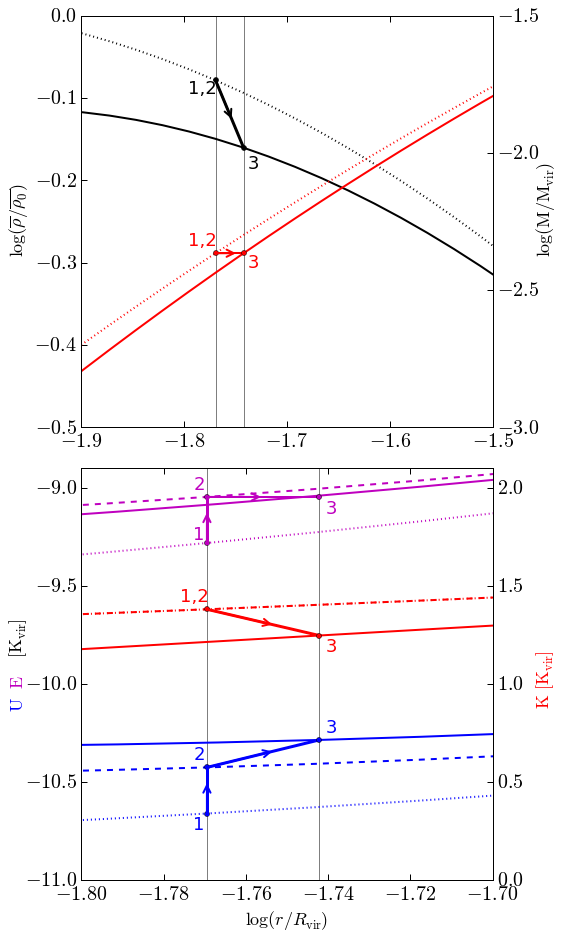

In [23]:
reload(evolving)
from evolving import *
from matplotlib.patches import ConnectionPatch

bbox=(-0.18, 0.4)
bbox2=(1.1, 0.4)
def multicolor_ylabel(ax,list_of_strings,list_of_colors,axis='x',anchorpad=0,bbbox=bbox,**kw):
    """this function creates axes labels with multiple colors
    ax specifies the axes object where the labels should be drawn
    list_of_strings is a list of all of the text items
    list_if_colors is a corresponding list of colors for the strings
    axis='x', 'y', or 'both' and specifies which label(s) should be drawn"""
    from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

    # x-axis label
    if axis=='x' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',**kw)) 
                    for text,color in zip(list_of_strings,list_of_colors) ]
        xbox = HPacker(children=boxes,align="center",pad=0, sep=5)
        anchored_xbox = AnchoredOffsetbox(loc=3, child=xbox, pad=anchorpad,frameon=False,bbox_to_anchor=bbbox,
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_xbox)

    # y-axis label
    if axis=='y' or axis=='both':
        boxes = [TextArea(text, textprops=dict(color=color, ha='left',va='bottom',rotation=90,**kw)) 
                     for text,color in zip(list_of_strings[::-1],list_of_colors) ]
        ybox = VPacker(children=boxes,align="center", pad=0, sep=5)
        anchored_ybox = AnchoredOffsetbox(loc=3, child=ybox, pad=anchorpad, frameon=False, bbox_to_anchor=bbbox, 
                                          bbox_transform=ax.transAxes, borderpad=0.)
        ax.add_artist(anchored_ybox)
        

ssi = gl[k]
ti = ssi['t']
ri = ssi['d']['r']
brhoi = ssi['d']['brho']
brhofiti = ssi['d'][fitname]['brho']
pi = ssi['d'][fitname]['p']
Rviri=rvir_fangzhou[k]
Mviri=mvir_fangzhou[k]
brhov = brhofiti[ri>0.01*Rviri][0] # <<<<

ssf = gl[k+1]
tf = ssf['t']
rf = ssf['d']['r']
brhof = ssf['d']['brho']
brhofitf = ssf['d'][fitname]['brho']
pf = ssf['d'][fitname]['p']
Rvirf=rvir_fangzhou[k+1]
Mvirf=mvir_fangzhou[k+1]

m=Mvirf-Mviri
print 'ftot = ', m/Mviri


# CASE 1A: mass added at the center, instantaneously
print ' '
print 'CASE 1A: mass added at the center, instantaneously'

(ci, ai, bi, gi, Rviri, Mviri) = pi

r=ri
m=-0.002*Mviri*ones(size(r))

Ui=prf.U(ri,pi)
Ki=get_T(ri,[0,0,0,pi],m=0.,Ttype='Tdekel')
Ei=Ui+Ki
Et=Ui+Ki-G*m/ri
Tviri=0.5*prf.G*Mviri/Rviri

# EVOLUTION
wcore = 0*(r<=rmin_evolve*Rvirf)+1*((r>rmin_evolve*Rvirf)&(r<=rmax_evolve*Rvirf))+0*(r>rmax_evolve*Rvirf)

Mcen=0
(ci, ai, bi, gi, Rviri, Mviri) = pi
pi=(ci, ai, bi, gi, Rviri, Mviri)
pnames=('c', 'a', 'b', 'g', 'Rvir', 'Mvir')
print 'Initial parameters:'
for i in range(size(pi)):
    print pnames[i], ' = ', pi[i]
    
print 'slope at 0.01Rvir: ', prf.s(0.01*Rviri,pi)


Mi = prf.M(ri, pi)
res = evolve(ri, ri, Mi, pi, m, alphai=0.,alphaf=0.,gammai=0., gammaf=0.,betai=0.,betaf=0.,Ttype='Tdekel',Mcen=0, w=wcore, model='an', method='halo',add_params=[],Rvirf=Rvirf,Mvirf=Mvirf)
(cf, af, bf, gf, Rvirf, Mvirf) = pi

print 'Final parameters:'
for i in range(size(pi)):
    print pnames[i], ' = ', pf[i]
    
print 'slope at 0.01Rvir: ', prf.s(0.01*Rvirf,pf)
    
p_model = res['pf']
brhoi = prf.brho(ri,pi)
brhov=brhoi[0]
brhof = prf.brho(ri,p_model)
Mf=prf.M(ri, p_model)

Mi = prf.M(ri, pi, "an")
rf_model = prf.inv_M(Mi, p_model, "an") #the new radii that enclose the same masses
Uf_model = prf.U(rf_model, p_model, "an")
Kf_model=get_T(rf_model,[0,0,0,p_model],m=m,Ttype='Tdekel')     
Ef_model=Uf_model-G*m/rf_model+Kf_model
brhofit_model = prf.brho(rf_model,p_model)
Mf_model=prf.M(rf_model, p_model)

Uf=prf.U(ri, p_model, "an")
Kf=get_T(ri,[0,0,0,p_model],m=m,Ttype='Tdekel')   
Ef=Uf-G*m/ri+Kf


# PLOT: INITIAL ENERGIES, WITH THE CORRESPONDING ONES AFTER THE FIT
# (WHICH ARE MORE OR LESS EQUAL)

axis1=[-1.8,-1.7,-11,-8.9]
axis2=[-1.8,-1.5,-2,2.]
axis3=[-1.9,-1.5,-0.5,0]
axis4=[-1.9,-1.5,-3.,-1.5]

ratio1=float(axis1[1]-axis1[0])/float(axis1[3]-axis1[2])
ratio3=float(axis3[1]-axis3[0])/float(axis3[3]-axis3[2])
ratio4=float(axis4[1]-axis4[0])/float(axis4[3]-axis4[2])

itest=8
kinetic_offset=-11
linewidth=2
head_width=0
head_length=0
arrow_width=0.5
head_width2=0.01
head_length2=0.1
overhang2=0

def plot_path(ax,xyi,xyf,color='r',head_length=1,head_width=0.5,linewidth=2,xyratio=0.5,no_line=False):
    dxy=xyf-xyi
    dxyarrow=xyratio*dxy
    xyarrow=xyi+dxyarrow
    xytext=xyi
    if not no_line:
        ax.arrow(xyi[0],xyi[1],dxy[0],dxy[1],fc=color,ec=color,length_includes_head=True,head_width=0,head_length=0,linewidth=linewidth)
    ax.annotate("",
            xy=xyarrow, xycoords='data',
            xytext=xytext, textcoords='data',
            arrowprops=dict(arrowstyle="->,head_width=%f,head_length=%f"%(head_width,head_length),lw=linewidth,connectionstyle="arc3",fc=color,color=color),
            )

def plot_annotation(ax,xyi,string,dxy=[0,0],color='r'):
    xy=array(xyi)+array(dxy)
    ax.annotate(string,xy=xy, xycoords='data',color=color)
    

##########################################
fig=figure(figsize=figsize)

ax11=subplot(211)
ax11.set(adjustable='box-forced',
        aspect=ratio3,
        xlim=axis3[:2],
        ylim=axis3[2:],
        xticks=arange(axis3[0],axis3[1]+0.1,0.1),
        yticks=arange(axis3[2],axis3[3]+0.2,0.2))
multicolor_ylabel(ax11,(r'$\rm \log(\overline{\rho}/\overline{\rho_0})$',''),('k','k'),axis='y',anchorpad=0)#,size=textfont+2)

ax11.tick_params(axis='both')#, labelsize=textfont)
ax11.axvline(x=log10(ri[itest]/Rviri),color='k',alpha=0.5)
ax11.axvline(x=log10(rf_model[itest]/Rviri),color='k',alpha=0.5)

xticknames=['$-1.9$','$-1.8$','$-1.7$','$-1.6$','$-1.5$']
xticks([-1.9,-1.8,-1.7,-1.6,-1.5],xticknames,visible=True)
yticknames=['$-0.5$','$-0.4$','$-0.3$','$-0.2$','$-0.1$','$0.0$']
yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0],yticknames,visible=True)

# Density profile
ax11.plot(log10(ri/Rviri),log10(brhoi/brhov),'k:',linewidth=linewidth,label=r'initial')
ax11.plot(log10(ri/Rviri),log10(brhof/brhov),'k',linewidth=linewidth)  

ax11.plot(log10(ri[itest]/Rviri),log10(brhoi[itest]/brhov),'k',marker='o',markersize=5)
ax11.plot(log10(rf_model[itest]/Rviri),log10(brhofit_model[itest]/brhov),'k',marker='o',markersize=5) 

xyi=array([log10(ri[itest]/Rviri),log10(brhoi[itest]/brhov)])
xyf=array([log10(rf_model[itest]/Rviri),log10(brhofit_model[itest]/brhov)])
plot_path(ax11,xyi,xyf,color='k',head_length=0.4,head_width=0.2,xyratio=0.6,linewidth=2)

plot_annotation(ax11,xyi,'1,2',[-0.025,-0.015],color='k')
plot_annotation(ax11,xyf,'3',[0.005,-0.025],color='k')

##########################################

# mass
ax12 = ax11.twinx()
ax12.set(adjustable='box-forced',
        aspect=ratio4,
        xlim=axis4[:2],
        ylim=axis4[2:],
        yticks=arange(axis4[2],axis4[3]+0.5,0.5))

ax12.tick_params(axis='both')#, labelsize=textfont)#,labelcolor='r')
multicolor_ylabel(ax12,(r'$\rm \log(M/M_{\rm vir})$',''),('k','k'),axis='y',bbbox=bbox2,anchorpad=0)#,size=textfont+2)

ax12.plot(log10(ri/Rviri),log10(Mi/Mviri),'r:',linewidth=linewidth,label=r'initial')
ax12.plot(log10(ri/Rviri),log10(Mf/Mviri),'r',linewidth=linewidth)  

ax12.plot(log10(ri[itest]/Rviri),log10(Mi[itest]/Mviri),'r',marker='o',markersize=5)
ax12.plot(log10(rf_model[itest]/Rviri),log10(Mi[itest]/Mviri),'r',marker='o',markersize=5) 

xyi=array([log10(ri[itest]/Rviri),log10(Mi[itest]/Mviri)])
xyf=array([log10(rf_model[itest]/Rviri),log10(Mi[itest]/Mviri)])
plot_path(ax12,xyi,xyf,color='r',head_length=0.4,head_width=0.2,xyratio=.8,linewidth=2)

plot_annotation(ax12,xyi,'1,2',[-0.025,+0.03],color='r')
plot_annotation(ax12,xyf,'3',[0.005,-0.05],color='r')

yticknames=['$-3.0$','$-2.5$','$-2.0$','$-1.5$']
yticks([-3.,-2.5,-2.,-1.5],yticknames,visible=True)

##########################################

ax21=subplot(212)
ax21.set(adjustable='box-forced',
        aspect=ratio1,
        xlim=axis1[:2],
        ylim=axis1[2:],
        xticks=arange(axis1[0],axis1[1]+0.05,0.05),
        yticks=arange(axis1[2],axis1[3]+0.5,0.5))
ax21.tick_params(axis='both')#, labelsize=textfont)
multicolor_ylabel(ax21,(r'$\rm U$',r'$\rm E$',r' $\rm [K_{vir}]$'),('k','m','b'),axis='y',anchorpad=0)#,size=textfont+2)
ax21.set_xlabel(r'$\log(r/R_{\rm vir})$')#,fontsize=textfont+2)
ax21.axvline(x=log10(ri[itest]/Rviri),color='k',alpha=0.5)
ax21.axvline(x=log10(rf_model[itest]/Rviri),color='k',alpha=0.5)

# Potential energy
ax21.plot(log10(ri/Rviri),Ui/Tviri,'b:',linewidth=linewidth,label=r'$U_i$')
ax21.plot(log10(ri/Rviri),Ui/Tviri-G*m/ri/Tviri,'b--',linewidth=linewidth,label=r'$U_t$')
ax21.plot(log10(rf_model/Rviri),Uf_model/Tviri-G*m/rf_model/Tviri,'b',linewidth=linewidth,label=r'$U_f$')

ax21.plot(log10(ri[itest]/Rviri),Ui[itest]/Tviri,'b',marker='o',markersize=5)
ax21.plot(log10(ri[itest]/Rviri),Ui[itest]/Tviri-G*m[itest]/ri[itest]/Tviri,'b',marker='o',markersize=5)
ax21.plot(log10(rf_model[itest]/Rviri),Uf_model[itest]/Tviri-G*m[itest]/rf_model[itest]/Tviri,'b',marker='o',markersize=5)

xyi=array([log10(ri[itest]/Rviri),Ui[itest]/Tviri])
xyf=array([log10(ri[itest]/Rviri),Ui[itest]/Tviri-G*m[itest]/ri[itest]/Tviri])
plot_path(ax21,xyi,xyf,color='b',head_length=0.4,head_width=0.2,xyratio=0.7,linewidth=2,no_line=True)
ax21.plot([xyi[0],xyf[0]],[xyi[1],xyf[1]],'b',linewidth=3)
plot_annotation(ax21,xyi,'1',[-0.003,-0.08],color='b')
plot_annotation(ax21,xyf,'2',[-0.003,+0.04],color='b')

xyi=array([log10(ri[itest]/Rviri),Ui[itest]/Tviri-G*m[itest]/ri[itest]/Tviri])
xyf=array([log10(rf_model[itest]/Rviri),Uf_model[itest]/Tviri-G*m[itest]/rf_model[itest]/Tviri])
plot_path(ax21,xyi,xyf,color='b',head_length=0.4,head_width=0.2,xyratio=0.6,linewidth=2)
plot_annotation(ax21,xyf,'3',[0.002,+0.04],color='b')


# Total energy
ax21.plot(log10(ri/Rviri),Ei/Tviri,'m:',linewidth=linewidth,label=r'$E_i$')
ax21.plot(log10(ri/Rviri),Et/Tviri,'m--',linewidth=linewidth,label=r'$E_t$')
ax21.plot(log10(rf_model/Rviri),Ef_model/Tviri,'m',linewidth=linewidth,label=r'$E_f$')

ax21.plot(log10(ri[itest]/Rviri),Ei[itest]/Tviri,'m',marker='o',markersize=5)
ax21.plot(log10(ri[itest]/Rviri),Et[itest]/Tviri,'m',marker='o',markersize=5)
ax21.plot(log10(rf_model[itest]/Rviri),Et[itest]/Tviri,'m',marker='o',markersize=5)

xyi=array([log10(ri[itest]/Rviri),Ei[itest]/Tviri])
xyf=array([log10(ri[itest]/Rviri),Et[itest]/Tviri])
plot_path(ax21,xyi,xyf,color='m',head_length=0.4,head_width=0.2,xyratio=0.7,linewidth=2,no_line=True)
ax21.plot([xyi[0],xyf[0]],[xyi[1],xyf[1]],'m',linewidth=3)
plot_annotation(ax21,xyi,'1',[-0.003,+0.02],color='m')
plot_annotation(ax21,xyf,'2',[-0.003,+0.04],color='m')

xyi=array([log10(ri[itest]/Rviri),Et[itest]/Tviri])
xyf=array([log10(rf_model[itest]/Rviri),Et[itest]/Tviri])
plot_path(ax21,xyi,xyf,color='m',head_length=0.4,head_width=0.2,xyratio=0.5,linewidth=2)
plot_annotation(ax21,xyf,'3',[0.002,-0.08],color='m')

xticknames=['$-1.80$','$-1.78$','$-1.76$','$-1.74$','$-1.72$','$-1.70$']
xticks([-1.8,-1.78,-1.76,-1.74,-1.72,-1.7],xticknames,visible=True)
yticknames=['$-11.0$','$-10.5$','$-10.0$','$-9.5$','$-9.0$']
yticks([-11.,-10.5,-10.,-9.5,-9.],yticknames,visible=True)

##########################################

axis2=axis1
axis2[2]=axis1[2]-kinetic_offset
axis2[3]=axis1[3]-kinetic_offset
ratio2=float(axis2[1]-axis2[0])/float(axis2[3]-axis2[2])

ax22 = ax21.twinx()
ax22.set(adjustable='box-forced',
        aspect=ratio2,
        xlim=axis2[:2],
        ylim=axis2[2:],
        yticks=arange(axis2[2],axis2[3]+0.5,0.5))

multicolor_ylabel(ax22,(r'$\rm K$'+r' $ \rm [K_{vir}]$',''),('r','r'),bbbox=bbox2,axis='y',anchorpad=0)#,size=textfont+2)

ax22.tick_params(axis='both')#, labelsize=textfont)#,labelcolor='r')

# Kinetic energy
ax22.plot(log10(ri/Rviri),Ki/Tviri,'r:',linewidth=linewidth,label=r'$K_i$')
ax22.plot(log10(ri/Rviri),Ki/Tviri,'r--',linewidth=linewidth,label=r'$K_t$')
ax22.plot(log10(rf_model/Rviri),Kf_model/Tviri,'r',linewidth=linewidth,label=r'$K_f$')

ax22.plot(log10(ri[itest]/Rviri),Ki[itest]/Tviri,'r',marker='o',markersize=5)
ax22.plot(log10(rf_model[itest]/Rviri),Kf_model[itest]/Tviri,'r',marker='o',markersize=5)

xyi=array([log10(ri[itest]/Rviri),Ki[itest]/Tviri])
xyf=array([log10(rf_model[itest]/Rviri),Kf_model[itest]/Tviri])
plot_path(ax22,xyi,xyf,color='r',head_length=0.4,head_width=0.2,xyratio=0.6,linewidth=2)
plot_annotation(ax22,xyi,'1,2',[-0.006,+0.04],color='r')
plot_annotation(ax22,xyf,'3',[0.002,-0.08],color='r')

yticknames=['$0.0$','$0.5$','$1.0$','$1.5$','$2.0$']
yticks([0.,0.5,1.,1.5,2.],yticknames,visible=True)


transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(ax11.transData.transform([-1.8,2.5]))
coord2 = transFigure.transform(ax21.transData.transform([-1.8,-9.]))
line1 = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]),transform=fig.transFigure,color='k')
coord1 = transFigure.transform(ax11.transData.transform([-1.7,2.5]))
coord2 = transFigure.transform(ax21.transData.transform([-1.7,-9.]))
line2 = matplotlib.lines.Line2D((coord1[0],coord2[0]),(coord1[1],coord2[1]),transform=fig.transFigure,color='k')
